Select the .venv kernel

In [1]:
import bad_sorts
import matplotlib.pyplot as plt
import time

# Author: Yashasvi Seth

In [2]:
# A better implementation of bubble sort
  
def bubblesort2(arr): 
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                key = arr[j+1]
                k = j
                while k >= 0 and arr[k] > key:
                    arr[k + 1] = arr[k]   # shift right
                    k -= 1
                arr[k + 1] = key

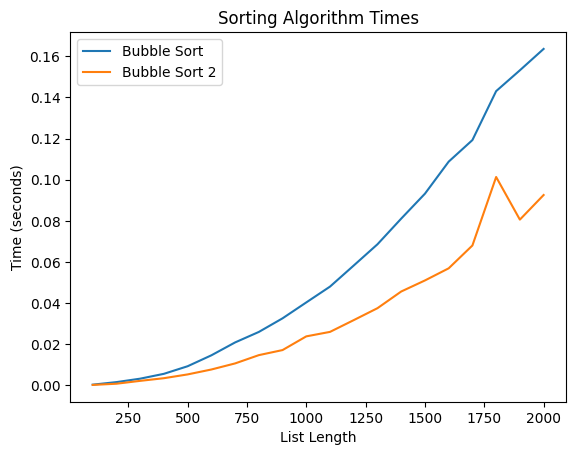

In [3]:
# Times for bubble_sort and bubblesort2

lengths = [n for n in range(100, 2001, 100)]  # from 100 to 2000 in steps of 100
runs = 3

bubble_times = [0] * len(lengths)
bubble2_times = [0] * len(lengths)

for _ in range(runs):
    for i, n in enumerate(lengths):
        lst = bad_sorts.create_random_list(n, 512)

        start = time.time()
        bad_sorts.bubble_sort(lst.copy())
        end = time.time()
        bubble_times[i] += end - start
        
        start = time.time()
        bubblesort2(lst.copy())
        end = time.time()
        bubble2_times[i] += end - start

# Average the times over the runs
bubble_times = [t / runs for t in bubble_times]
bubble2_times = [t / runs for t in bubble2_times]

# plot 2 algorithms into one graph
plt.plot(lengths, bubble_times, label='Bubble Sort')
plt.plot(lengths, bubble2_times, label='Bubble Sort 2')
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Times')
plt.legend()
plt.show()

In [4]:
# A better implementation of selection sort

def selectionsort2(arr):
    n = len(arr)
    for i in range(n // 2):
        # finding the min and max in the unsorted subarray
        min_index = find_min_index(arr, i)
        max_index = find_max_index(arr, n - i - 1)

        arr[i], arr[min_index] = arr[min_index], arr[i] # performing swap for minimum element

        # Check if max was at the position of min_index
        if max_index == i:
            max_index = min_index

        # Swap the found maximum element with the last element
        arr[n - i - 1], arr[max_index] = arr[max_index], arr[n - i - 1]


# Helpter functions for selectionsort2
def find_min_index(L, n):
    min_index = n
    for i in range(n+1, len(L)):
        if L[i] < L[min_index]:
            min_index = i
    return min_index

def find_max_index(L, n):
    max_index = n
    for i in range(n+1, len(L)):
        if L[i] > L[max_index]:
            max_index = i
    return max_index

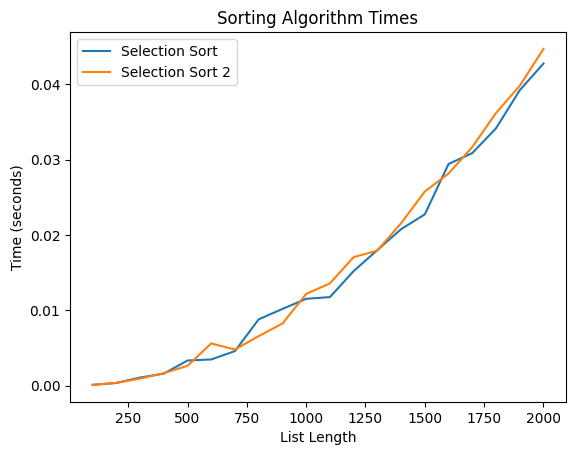

In [5]:
# Times for selection_sort and selectionsort2

lengths = [n for n in range(100, 2001, 100)]  # from 100 to 2000 in steps of 100

selection_times = []
selection2_times = []


for n in lengths:
    lst = bad_sorts.create_random_list(n, 512)

    start = time.time()
    bad_sorts.selection_sort(lst.copy())
    end = time.time()
    selection_times.append(end - start)

    start = time.time()
    selectionsort2(lst.copy())
    end = time.time()
    selection2_times.append(end - start)

# plot 2 algorithms into one graph
plt.plot(lengths, selection_times, label='Selection Sort')
plt.plot(lengths, selection2_times, label='Selection Sort 2')
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Times')
plt.legend()
plt.show()